In [99]:
#***************************************************************************************
# Name: Jonah Zembower
# Date: 5/7/2024
# Final Project for Advanced Data Science Customer Segmentation and Behavior Prediction
#***************************************************************************************

In [100]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Data Preprocessing:

In [101]:
# Load the dataset
customer_data = pd.read_csv('/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Advanced Data Science/Projects/Final Project/customer_data.csv')

# Display the first few rows of the dataset
customer_data.head()

,Customer_ID,Age,Gender,Annual_Income,Total_Purchases,Average_Purchase_Value,Product_Category_Most_Purchased,Website_Visits_Last_Month,Marketing_Emails_Opened,Hours_Spent_on_Support_Calls,Churn,Future_Purchase
0,1,39,Male,44520,4,44.291883,Clothing,12,3,0.360258,0,1
1,2,33,Female,52770,3,121.963922,Electronics,12,8,0.141300,1,1
2,3,41,Male,29793,5,100.599885,Electronics,9,4,0.482833,0,1
3,4,50,Female,35425,1,94.843412,Home,6,4,0.227715,0,1
4,5,32,Male,68006,6,119.680829,Books,6,3,1.032819,0,1


- Here are the features for each customer:
  - Customer_ID: Unique identifier for the customer
  - Age: Customer's age
  - Gender: Customer's gender
  - Annual_Income: Annual income of the customer
  - Total_Purchases: Total number of purchases made by the customer
  - Average_Purchase_Value: Average value of purchases
  - Product_Category_Most_Purchased: Category of the most purchased products
  - Website_Visits_Last_Month: Number of times the customer visited the website in the last month
  - Marketing_Emails_Opened: Number of marketing emails opened by the customer
  - Hours_Spent_on_Support_Calls: Total hours spent by the customer on support calls
  - churn: 1 if they are leaving as a customer, and 0 if they stay

In [102]:
# Display the data types of the dataset
customer_data.dtypes

Customer_ID                          int64
Age                                  int64
Gender                              object
Annual_Income                        int64
Total_Purchases                      int64
Average_Purchase_Value             float64
Product_Category_Most_Purchased     object
Website_Visits_Last_Month            int64
Marketing_Emails_Opened              int64
Hours_Spent_on_Support_Calls       float64
Churn                                int64
Future_Purchase                      int64
dtype: object

In [103]:
# Display the number of missing values in the dataset
customer_data.isnull().sum()

Customer_ID                        0
Age                                0
Gender                             0
Annual_Income                      0
Total_Purchases                    0
Average_Purchase_Value             0
Product_Category_Most_Purchased    0
Website_Visits_Last_Month          0
Marketing_Emails_Opened            0
Hours_Spent_on_Support_Calls       0
Churn                              0
Future_Purchase                    0
dtype: int64

The dataset is loaded successfully and it seems there are no missing values across all columns, which simplifies our preprocessing task. Here's a brief overview of the dataset:

- There are numerical and categorical columns.
- Data types appear appropriate for each feature.
- No missing values in any of the columns.

Here are the outlooks of the categorical variables:

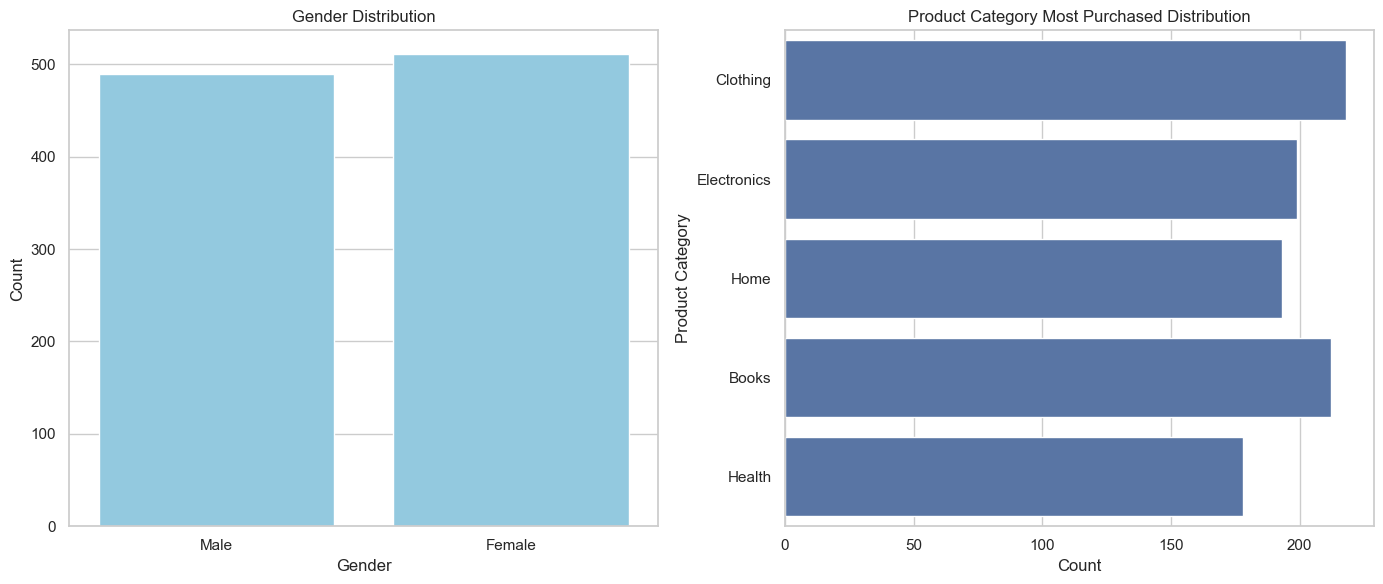

In [104]:
# Create bar graphs for categorical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotting 'Gender' distribution
sns.countplot(x='Gender', data=customer_data, ax=axes[0], color='skyblue')
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Plotting 'Product_Category_Most_Purchased' distribution
sns.countplot(y='Product_Category_Most_Purchased', data=customer_data, ax=axes[1])
axes[1].set_title('Product Category Most Purchased Distribution')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Product Category')

plt.tight_layout()
plt.show()


There appear to be slightly more females than men in the dataset. Also, clothing and books are the most purhcased items, yet the health category is the least purhcased.

Here are the outlooks of the numerical variables:

In [105]:
# Compute descriptive statistics for numerical variables
numerical_descriptive_stats = customer_data.describe()
numerical_descriptive_stats


,Customer_ID,Age,Annual_Income,Total_Purchases,Average_Purchase_Value,Website_Visits_Last_Month,Marketing_Emails_Opened,Hours_Spent_on_Support_Calls,Churn,Future_Purchase
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,34.674000,50445.511000,4.911000,99.777934,9.921000,5.043000,0.988863,0.156000,0.681000
std,288.819436,9.797741,14761.007164,2.060418,20.709083,3.236237,1.604907,1.011621,0.363037,0.466322
min,1.000000,2.000000,4707.000000,0.000000,35.678856,2.000000,1.000000,0.000554,0.000000,0.000000
25%,250.750000,28.000000,40680.250000,3.000000,85.500221,8.000000,4.000000,0.286220,0.000000,0.000000
50%,500.500000,35.000000,50251.000000,5.000000,99.793857,10.000000,5.000000,0.703243,0.000000,1.000000
75%,750.250000,41.000000,60263.250000,6.000000,114.075247,12.000000,6.000000,1.373520,0.000000,1.000000
max,1000.000000,73.000000,97896.000000,14.000000,165.527987,21.000000,9.000000,9.495716,1.000000,1.000000


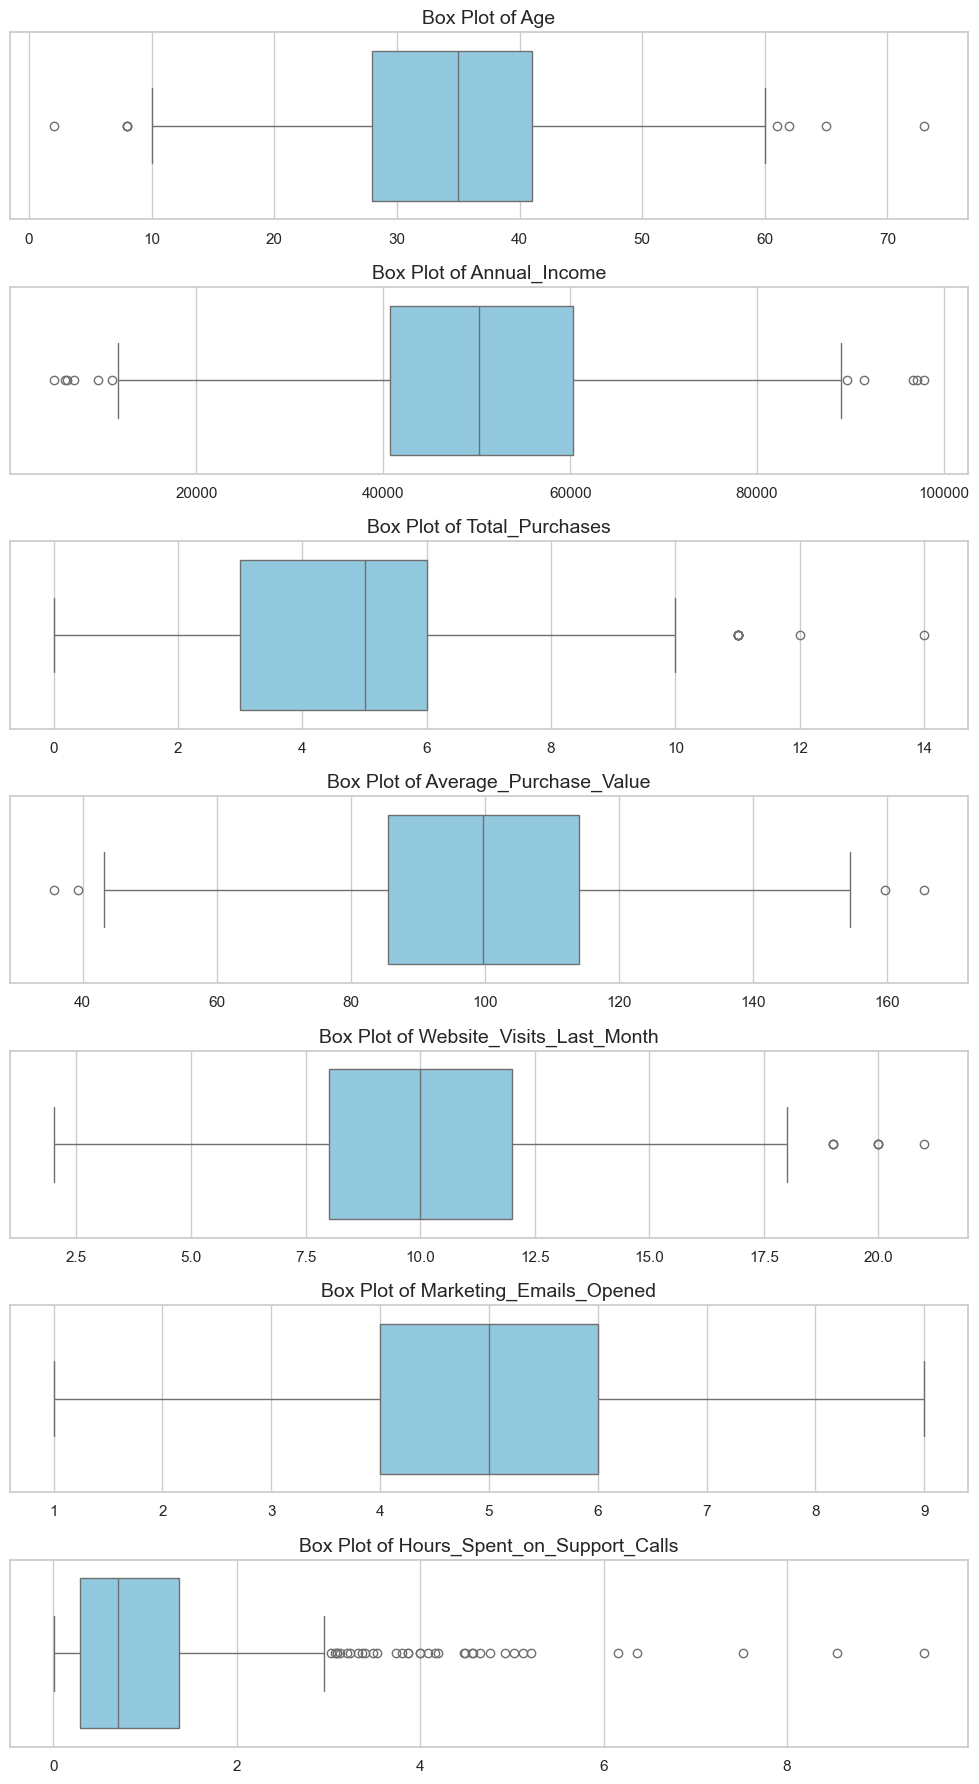

In [106]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Selecting numerical columns for box plots (excluding Customer_ID as it's just an identifier)
numerical_columns = ['Age', 'Annual_Income', 'Total_Purchases', 'Average_Purchase_Value',
                     'Website_Visits_Last_Month', 'Marketing_Emails_Opened', 'Hours_Spent_on_Support_Calls']

# Create box plots for numerical variables
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 18))

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=customer_data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Box Plot of {col}', fontsize=14)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


- Explanation of Box Plots:
  - Age: Most of the data points are within a reasonable range, though there are some potential outliers for very young ages.
  - Annual Income: There are some high outliers, indicating a few customers with significantly higher incomes than the average.
  - Total Purchases: This distribution also includes outliers where a few customers have made notably more purchases than typical.
  - Average Purchase Value: A few outliers on both the high and low ends, suggesting some purchases were unusually expensive or cheap.
  - Website Visits Last Month: The distribution is relatively tight, but there are a few outliers indicating unusually high visit frequencies.
  - Marketing Emails Opened: Most data points are close together with some outliers on the higher side.
  - Hours Spent on Support Calls: While the distribution is generally low, there are significant outliers, suggesting a few customers required much more support time than others.

Correlation Matrix:

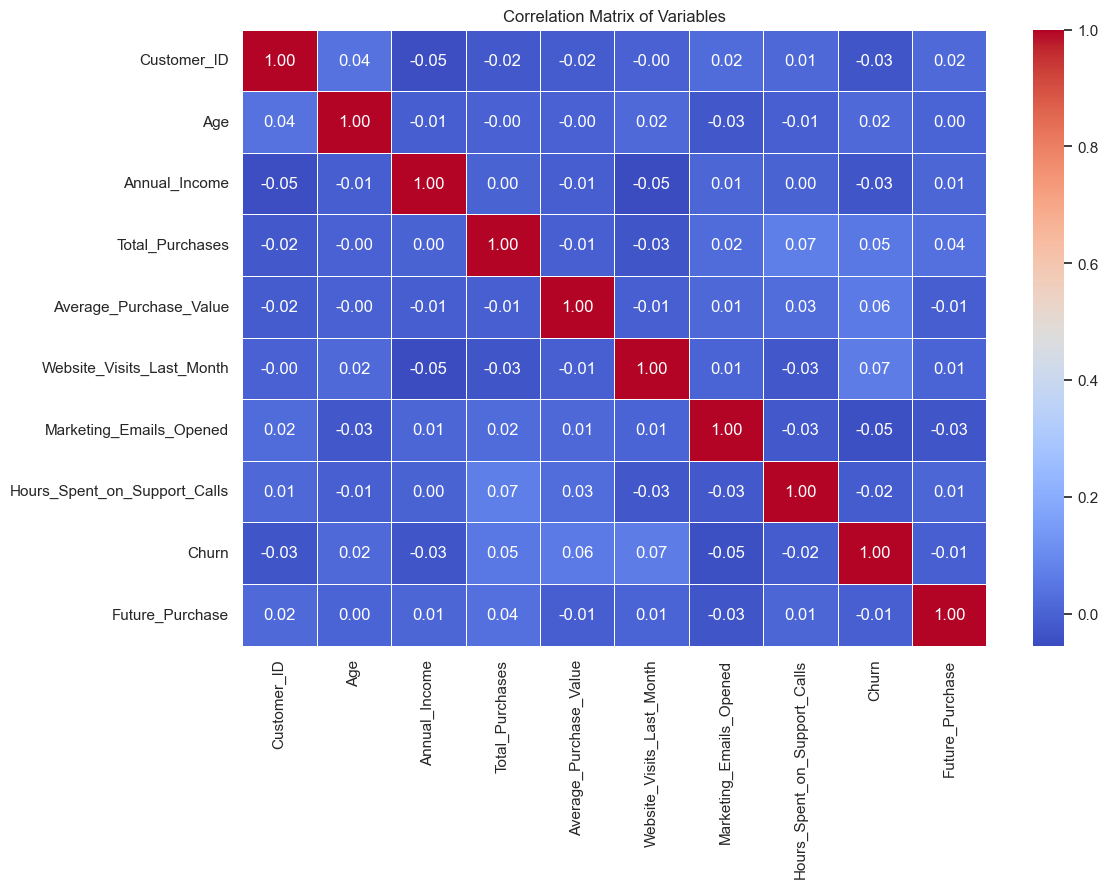

In [107]:
# Compute the correlation matrix
correlation_matrix = customer_data.corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Variables")
plt.show()


There are no correlations between variables that are cause for removal of any features. Thus, we will leave all the features as they are. 

Now: 
       
- Encode Categorical Variables: Convert categorical variables ('Gender' and 'Product_Category_Most_Purchased') into a format suitable for modelin.
- Scale Numerical Data: Since algorithms like K-means clustering are sensitive to the scale of data, we should normalize or standardize the numerical features.       

In [108]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical columns
categorical_columns = ['Gender', 'Product_Category_Most_Purchased']
encoded_data = encoder.fit_transform(customer_data[categorical_columns])

# Correct way to create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Display the encoded DataFrame
print(encoded_df.head())


   Gender_Female  Gender_Male  Product_Category_Most_Purchased_Books  \
0            0.0          1.0                                    0.0   
1            1.0          0.0                                    0.0   
2            0.0          1.0                                    0.0   
3            1.0          0.0                                    0.0   
4            0.0          1.0                                    1.0   

   Product_Category_Most_Purchased_Clothing  \
0                                       1.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   Product_Category_Most_Purchased_Electronics  \
0                                          0.0   
1                                          1.0   
2                                          1.0   
3                                          0.0   
4                                 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [109]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Selecting numerical columns for scaling (excluding 'Customer_ID' and binary columns like 'Churn' and 'Future_Purchase')
scaling_columns = ['Age', 'Annual_Income', 'Total_Purchases', 'Average_Purchase_Value',
                   'Website_Visits_Last_Month', 'Marketing_Emails_Opened', 'Hours_Spent_on_Support_Calls']

# Fit and transform the numerical data
scaled_data = scaler.fit_transform(customer_data[scaling_columns])

# Creating a DataFrame from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=scaling_columns)

# Showing a preview of the scaled DataFrame
scaled_df.head()


,Age,Annual_Income,Total_Purchases,Average_Purchase_Value,Website_Visits_Last_Month,Marketing_Emails_Opened,Hours_Spent_on_Support_Calls
0,0.441751,-0.401631,-0.442364,-2.680651,0.642734,-1.273608,-0.621695
1,-0.170941,0.157554,-0.927946,1.071853,0.642734,1.843396,-0.838247
2,0.645982,-1.399826,0.043217,0.039710,-0.284732,-0.650207,-0.500468
3,1.565021,-1.018090,-1.899108,-0.238397,-1.212198,-0.650207,-0.752781
4,-0.273057,1.190249,0.528798,0.961552,-1.212198,-1.273608,0.043473


In [110]:
# Concatenate the scaled numerical data, encoded categorical data, and binary columns
processed_data = pd.concat([
    scaled_df,                      # Scaled numerical data
    encoded_df,                     # Encoded categorical data
    customer_data[['Churn', 'Future_Purchase']]  # Binary columns
], axis=1)

# Show a preview of the fully processed DataFrame
processed_data.head()


,Age,Annual_Income,Total_Purchases,Average_Purchase_Value,Website_Visits_Last_Month,Marketing_Emails_Opened,Hours_Spent_on_Support_Calls,Gender_Female,Gender_Male,Product_Category_Most_Purchased_Books,Product_Category_Most_Purchased_Clothing,Product_Category_Most_Purchased_Electronics,Product_Category_Most_Purchased_Health,Product_Category_Most_Purchased_Home,Churn,Future_Purchase
0,0.441751,-0.401631,-0.442364,-2.680651,0.642734,-1.273608,-0.621695,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,1
1,-0.170941,0.157554,-0.927946,1.071853,0.642734,1.843396,-0.838247,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1
2,0.645982,-1.399826,0.043217,0.039710,-0.284732,-0.650207,-0.500468,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1
3,1.565021,-1.018090,-1.899108,-0.238397,-1.212198,-0.650207,-0.752781,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1
4,-0.273057,1.190249,0.528798,0.961552,-1.212198,-1.273608,0.043473,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,1


# Clustering Techniques:

- Clustering Techniques: We'll use K-means and hierarchical clustering to segment the customers based on their behaviors and traits.
- Evaluate Clusters: After applying clustering, we'll evaluate the clusters using metrics like the silhouette score to measure the quality of clustering.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

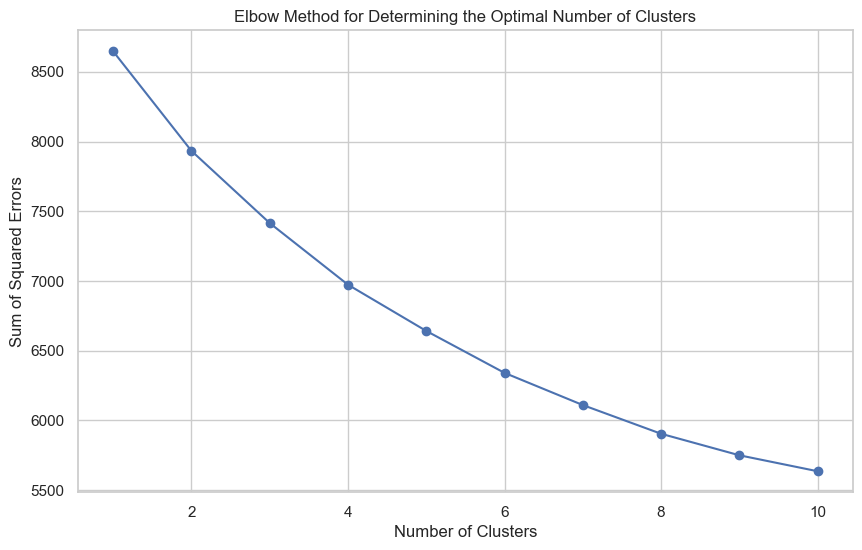

In [111]:
# Determine the optimal number of clusters using the Elbow Method
sse = []  # Sum of squared errors
k_values = range(1, 11)  # Testing 1 to 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(processed_data)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Determining the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.grid(True)
plt.show()


The Elbow Method plot shows how the sum of squared errors (SSE) decreases as the number of clusters increases. It looks like the curve starts to flatten around k=3 or k=4, suggesting that these might be good choices for the number of clusters.

Decision:
We can start by evaluating both 3 and 4 clusters using K-means, and then check the silhouette scores for these cluster solutions to decide on the best number.

In [112]:
# Function to apply K-means and calculate silhouette score
def apply_kmeans_and_score(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    return labels, score

# Apply K-means with 3 and 4 clusters
labels_3, score_3 = apply_kmeans_and_score(3, processed_data)
labels_4, score_4 = apply_kmeans_and_score(4, processed_data)

# Output silhouette scores
score_3, score_4


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.0834101672974745, 0.07886511862528289)

The silhouette scores for the clusters are as follows:
- For k=3 clusters: 0.0834
- For k=4 clusters: 0.0789

These scores are relatively low, indicating that the clusters are not very distinct or well-separated. However, the score is slightly higher for k=3 clusters, suggesting it might be a marginally better configuration for segmenting this particular dataset.

Now we will try Hierarchical clustering.

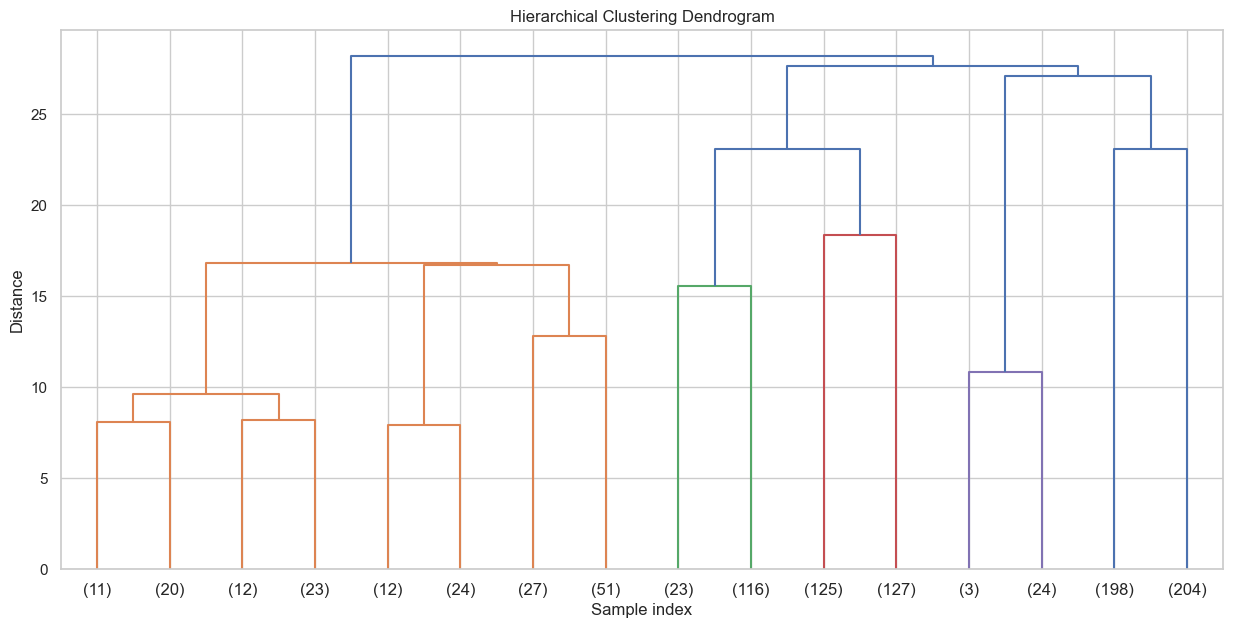

In [113]:
# Perform hierarchical clustering using the Ward method
linked = linkage(processed_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 7))
dendrogram(linked, truncate_mode='level', p=3)  # show only the last p merged clusters
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


The dendrogram from hierarchical clustering helps to visualize the data's cluster structure. The height of the merges in the dendrogram indicates the distance at which particular clusters are combined. Short vertical lines indicate clusters that are closely related, while long vertical lines suggest the combination of more distinct groups.

Interpreting the Dendrogram:
- The longest vertical lines without any intersecting horizontal lines suggest natural cluster separations. In this dendrogram, we see a significant merge distance which could imply a good number of clusters.

We could consider cutting the dendrogram at various heights to form different numbers of clusters. Common choices might include cutting to form three or four clusters, similar to our analysis with K-means.

Let's perform Agglomerative Clustering with 3 and 4 clusters (as suggested by the dendrogram and previous analysis) to evaluate which provides better segmentation based on the silhouette scores.

In [114]:
# Apply Agglomerative Clustering with 3 and 4 clusters
agg_labels_3 = AgglomerativeClustering(n_clusters=3).fit_predict(processed_data)
agg_labels_4 = AgglomerativeClustering(n_clusters=4).fit_predict(processed_data)

# Calculate silhouette scores for Agglomerative Clustering with 3 and 4 clusters
agg_score_3 = silhouette_score(processed_data, agg_labels_3)
agg_score_4 = silhouette_score(processed_data, agg_labels_4)

agg_score_3, agg_score_4


(0.0406311883047711, 0.047178838583875865)

The silhouette scores for Agglomerative Clustering are as follows:
- For k=3 clusters: 0.0406
- For k=4 clusters: 0.0472

These scores are lower than those obtained from K-means clustering, indicating that the hierarchical clustering did not result in better segmentation for this dataset. The K-means approach with k=4 provided the highest silhouette score among all tested configurations, suggesting it may be the best option for segmenting this particular dataset.

In [115]:
# Adding cluster labels to the processed data for cluster mean calculation
processed_data_with_labels_3 = processed_data.copy()
processed_data_with_labels_3['Customer Personas'] = labels_3

# Calculate mean of features for each cluster in the 3-cluster solution
cluster_means_3 = processed_data_with_labels_3.groupby('Customer Personas').mean()

(cluster_means_3)


,Age,Annual_Income,Total_Purchases,Average_Purchase_Value,Website_Visits_Last_Month,Marketing_Emails_Opened,Hours_Spent_on_Support_Calls,Gender_Female,Gender_Male,Product_Category_Most_Purchased_Books,Product_Category_Most_Purchased_Clothing,Product_Category_Most_Purchased_Electronics,Product_Category_Most_Purchased_Health,Product_Category_Most_Purchased_Home,Churn,Future_Purchase
Customer Personas,,,,,,,,,,,,,,,,
0,-0.080314,-0.174851,0.358844,0.209221,0.099780,-0.248893,1.685427,0.581250,0.418750,0.193750,0.243750,0.193750,0.225000,0.143750,0.156250,0.700000
1,0.195036,0.259284,0.174652,0.588898,-0.277759,0.520037,-0.302782,0.531328,0.468672,0.180451,0.258145,0.172932,0.182957,0.205514,0.167920,0.676692
2,-0.147323,-0.171153,-0.288212,-0.608720,0.215104,-0.380208,-0.337547,0.467120,0.532880,0.247166,0.172336,0.224490,0.156463,0.199546,0.145125,0.678005


In [116]:
# Recreating the scaler and fitting it to the original data
scaler = StandardScaler()
scaler.fit(customer_data[numerical_columns])  # Fitting to the original data

# Creating the cluster means DataFrame from the data
cluster_means_data = {
    'Age': [-0.080314, 0.195036, -0.147323],
    'Annual_Income': [-0.174851, 0.259284, -0.171153],
    'Total_Purchases': [0.358844, 0.174652, -0.288212],
    'Average_Purchase_Value': [0.209221, 0.588898, -0.608720],
    'Website_Visits_Last_Month': [0.099780, -0.277759, 0.215104],
    'Marketing_Emails_Opened': [-0.248893, 0.520037, -0.380208],
    'Hours_Spent_on_Support_Calls': [1.685427, -0.302782, -0.337547]
}
cluster_means_df = pd.DataFrame(cluster_means_data, index=[0, 1, 2])

# Inverse transforming the standardized cluster means to original scale
original_cluster_means = scaler.inverse_transform(cluster_means_df)

# Creating a DataFrame for the original scale cluster means
original_cluster_means_df = pd.DataFrame(original_cluster_means, columns=numerical_columns, index=[0, 1, 2])
original_cluster_means_df


,Age,Annual_Income,Total_Purchases,Average_Purchase_Value,Website_Visits_Last_Month,Marketing_Emails_Opened,Hours_Spent_on_Support_Calls
0,33.887498,47865.824948,5.649999,104.108542,10.243750,4.643750,2.693023
1,36.583956,54270.889856,5.270676,111.967372,9.022556,5.877194,0.682716
2,33.231289,47920.383852,4.317460,87.178206,10.616779,4.433107,0.647564


In [117]:
# Adding categorical data
categorical_data = {
    'Gender_Female': [0.581250, 0.531328, 0.467120],
    'Gender_Male': [0.418750, 0.468672, 0.532880],
    'Product_Category_Most_Purchased_Books': [0.193750, 0.180451, 0.247166],
    'Product_Category_Most_Purchased_Clothing': [0.243750, 0.258145, 0.172336],
    'Product_Category_Most_Purchased_Electronics': [0.193750, 0.172932, 0.224490],
    'Product_Category_Most_Purchased_Health': [0.225000, 0.182957, 0.156463],
    'Product_Category_Most_Purchased_Home': [0.143750, 0.205514, 0.199546],
    'Churn': [0.156250, 0.167920, 0.145125],
    'Future_Purchase': [0.700000, 0.676692, 0.67800]
}
categorical_df = pd.DataFrame(categorical_data, index=[0, 1, 2])

# Merging numerical and categorical dataframes
full_cluster_means_df = pd.concat([original_cluster_means_df, categorical_df], axis=1)

# Displaying the full cluster means DataFrame
full_cluster_means_df


,Age,Annual_Income,Total_Purchases,Average_Purchase_Value,Website_Visits_Last_Month,Marketing_Emails_Opened,Hours_Spent_on_Support_Calls,Gender_Female,Gender_Male,Product_Category_Most_Purchased_Books,Product_Category_Most_Purchased_Clothing,Product_Category_Most_Purchased_Electronics,Product_Category_Most_Purchased_Health,Product_Category_Most_Purchased_Home,Churn,Future_Purchase
0,33.887498,47865.824948,5.649999,104.108542,10.243750,4.643750,2.693023,0.581250,0.418750,0.193750,0.243750,0.193750,0.225000,0.143750,0.156250,0.700000
1,36.583956,54270.889856,5.270676,111.967372,9.022556,5.877194,0.682716,0.531328,0.468672,0.180451,0.258145,0.172932,0.182957,0.205514,0.167920,0.676692
2,33.231289,47920.383852,4.317460,87.178206,10.616779,4.433107,0.647564,0.467120,0.532880,0.247166,0.172336,0.224490,0.156463,0.199546,0.145125,0.678000


- Interpreting These Clusters:
  - Cluster 0: Could be seen as "Engaged General Shoppers" due to their moderate engagement across purchasing and support but higher support calls indicating potential issues or high engagement with services.
  - Cluster 1: Appears to be "Affluent, Casual Shoppers" with higher incomes, the highest average purchase values, and a moderate number of purchases and engagements, but fewer website visits and minimal time on support.
  - Cluster 2: Might represent "Economical, Active Browsers" with the lowest average purchase values and total purchases but active website visits, indicating frequent browsing with less commitment to purchases.

# Logistic Regression:

Step 1 Data Preparation:

We'll start by preparing the dataset for logistic regression modeling. This includes defining our feature matrix(X) and our target vector (y)

In [118]:
# Data Preparation
X = processed_data_with_labels_3.drop(['Churn', 'Future_Purchase', 'Customer Personas'], axis=1)  # features
y = processed_data_with_labels_3['Future_Purchase']  # target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Step 2 Model Building and Fit Logistic Regression Model:

With the data prepared and split into training and testing sets, we can now build the logistic regression model. We'll fit this model on the training data.

In [119]:
# Initialize and fit the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # probabilities for the positive class (purchase)


Step 4: Model Evaluation

Now that we have our model predictions, we'll evaluate the model using the ROC curve and calculate the AUC to understand how well our model is performing in terms of distinguishing between the classes (making a purchase or not).



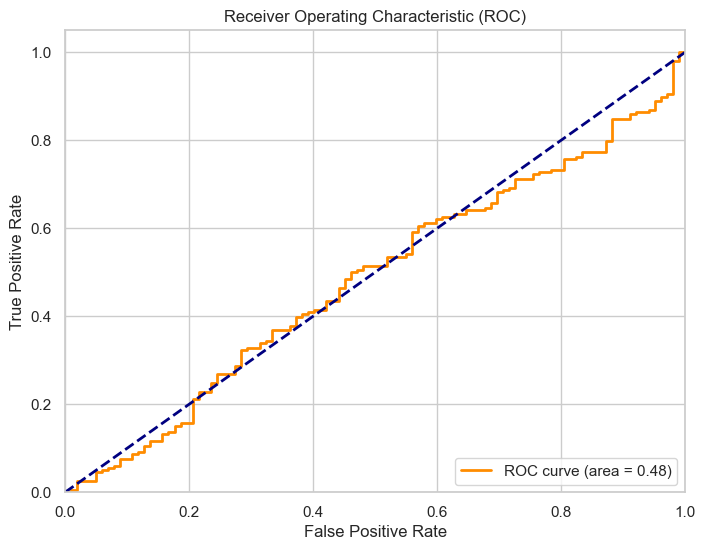

0.48405624876213105

In [120]:
# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

auc_score


The ROC curve and the AUC score provide insights into the model's performance:
- ROC Curve: This curve plots the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The curve gives us a visual idea of the trade-off between sensitivity (TPR) and specificity (1 - FPR).
- AUC Score: The Area Under the Curve (AUC) score of approximately 0.48 suggests that the model performs poorly in distinguishing between customers who will make a purchase and those who will not. An AUC score of 0.5 would indicate a model with no discriminatory ability, equivalent to random guessing.

Some issues with the model:
- Insufficient or irrelevant features: The feautres used might not be strong predictors for future purchases.
- Logistic regression is a linear model and may not capture complex patterns in the data. Trying more complex models or feature engineering might improve performance.

# Neural Network:

Step 1: Model Development
Let's create a neural network using Keras. We'll design a simple feedforward network with several layers, suitable for binary classification.

In [121]:
# Define the neural network structure
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer with ReLU activation
    Dense(32, activation='relu'),  # Hidden layer with ReLU activation
    Dense(16, activation='relu'),  # Another hidden layer
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the neural network
nn_model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                960       
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
# Initialize the MLP Classifier
mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', 
                          random_state=1, max_iter=500)

# Fit the model to the training data
mlp_model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32, 16), max_iter=500, random_state=1)

Step 2: Model Evaluation
We will assess the MLP model's performance on the test set by calculating accuracy, precision, and recall. We'll then prepare these metrics for both the MLP and the logistic regression models for comparison.

In [123]:

# Predictions from the MLP model
mlp_predictions = mlp_model.predict(X_test)

# Calculate accuracy, precision, and recall for MLP
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions)
mlp_recall = recall_score(y_test, mlp_predictions)

mlp_accuracy, mlp_precision, mlp_recall


(0.56, 0.6473214285714286, 0.7323232323232324)

The Multi-layer Perceptron (MLP) model's performance metrics are as follows:

Accuracy: 56%

Precision: 64.73%

Recall: 73.23%

These values reflect the model's overall ability to correctly identify churn, though the accuracy is relatively low, suggesting a substantial number of misclassifications.

In [124]:
# Predictions from the logistic regression model
logistic_predictions = logistic_model.predict(X_test)

# Calculate accuracy, precision, and recall for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)

logistic_accuracy, logistic_precision, logistic_recall


(0.66, 0.66, 1.0)

The logistic regression model's performance metrics are:

Accuracy: 66%

Precision: 66%

Recall: 100%

- Analysis and Comparison:
  - The logistic regression model has a higher accuracy and precision compared to the MLP model.
  - The recall is notably high for the logistic regression model, indicating it is particularly good at identifying all positive cases (customers who will churn), but this might also suggest a higher false positive rate given its precision is the same as its accuracy.
- Given these comparisons, while the MLP model has lower accuracy and precision, its balance between precision and recall might make it more useful depending on the business context, particularly if minimizing false negatives (failing to identify potential churn) is more critical.

In [125]:
# Define different configurations for MLP models
configurations = [
    (32, 16),  # Smaller network
    (128, 64),  # Larger network
    (64, 32, 16, 8)  # Deeper network
]

# Evaluate each configuration using cross-validation
cv_scores = {}
for config in configurations:
    model = MLPClassifier(hidden_layer_sizes=config, activation='relu', 
                          random_state=1, max_iter=1000)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores[str(config)] = scores.mean()

cv_scores


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'(32, 16)': 0.5657142857142856,
 '(128, 64)': 0.5571428571428572,
 '(64, 32, 16, 8)': 0.5828571428571429}

- Configuration (32, 16): 56.57% Accuracy
- Configuration (128, 64): 55.71% Accuracy
- Configuration (64, 32, 16, 8): 58.29% Accuracy

These results indicate that the MLP model with the configuration of (64, 32, 16, 8) performed the best among the tested configurations, though the improvement is modest.

- Business Impact Analysis:
  - Considering the business impact of the model's predictions, particularly the trade-offs between false positives and false negatives, is crucial:
    - False Positives: Incorrectly predicting churn when it won't happen can lead to unnecessary spending on retention strategies.
    - False Negatives: Missing out on predicting actual churn can result in lost revenue and customer relationships.
  - Adjusting the decision threshold based on the cost associated with each type of error and using metrics like the F1 score or the cost-sensitive learning methods can help align the model’s performance with business objectives.

I will now evaluate other models to see how they do as well in relation to the MLP.

In [126]:
# Initialize the models with default settings
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "SVM": SVC(probability=True, random_state=0),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Gradient Boosting": GradientBoostingClassifier(random_state=0)
}

# Dictionary to store the evaluation results
model_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    model_results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall
    }

model_results


{'Decision Tree': {'Accuracy': 0.5666666666666667,
  'Precision': 0.67,
  'Recall': 0.6767676767676768},
 'SVM': {'Accuracy': 0.66, 'Precision': 0.66, 'Recall': 1.0},
 'Random Forest': {'Accuracy': 0.6466666666666666,
  'Precision': 0.6666666666666666,
  'Recall': 0.9292929292929293},
 'Gradient Boosting': {'Accuracy': 0.62,
  'Precision': 0.6555555555555556,
  'Recall': 0.8939393939393939}}

- Analysis of Results:
  - The SVM model shows the highest accuracy and has an exceptionally high recall, but this may indicate that the model is biased towards predicting the majority class for churn, potentially leading to many false positives.
  - Decision Tree has the lowest accuracy but offers a good balance between precision and recall among the non-SVM models.
  - Both Random Forest and Gradient Boosting have reasonable accuracies with high recall rates, suggesting they are good at identifying true positives but may also be including some false positives.

- Decision Threshold Adjustment
  - Let's proceed by adjusting the decision threshold for the Random Forest model to see if we can improve the precision without sacrificing too much recall. We'll plot the precision-recall curve and select a new threshold based on that.

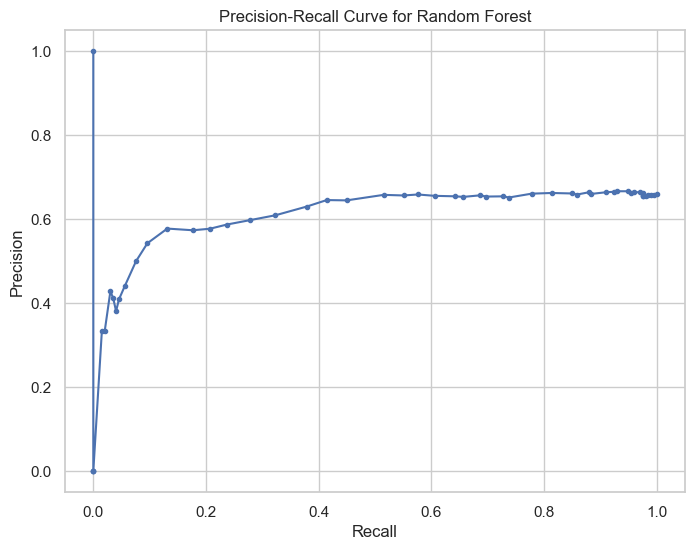

In [127]:
# Predict probabilities for the Random Forest model
y_scores_rf = models['Random Forest'].predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_scores_rf)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, marker='.')
plt.title('Precision-Recall Curve for Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

- Analysis of the Precision-Recall Curve:
  - High Precision Region: At the beginning of the curve, the precision starts very high but drops sharply as recall increases. This region is useful if your priority is to minimize false positives.
  - Stable Precision Region: As recall increases from approximately 0.2 to 1.0, the precision stabilizes around 0.6. This is a broad range where the trade-off between recall and precision might be acceptable depending on your business needs.
- Threshold Adjustment:
  - It can be estimated based on the elbow of the curve at about a recall of 0.4 to 0.5. From there, we can see the precision is also relatively high.

In [128]:
# Assuming y_scores_rf contains the probability predictions for the Random Forest model
# Apply a new threshold of 0.4 to determine class predictions
threshold = 0.4
adjusted_predictions = (y_scores_rf > threshold).astype(int)

# Calculate the revised performance metrics with the new threshold
adjusted_accuracy = accuracy_score(y_test, adjusted_predictions)
adjusted_precision = precision_score(y_test, adjusted_predictions)
adjusted_recall = recall_score(y_test, adjusted_predictions)

adjusted_accuracy, adjusted_precision, adjusted_recall

(0.6433333333333333, 0.6542372881355932, 0.9747474747474747)

We can see that the following values exhibit:
- Adjusted Accuracy: 64.33%
  - This indicates the overall percentage of correct predictions (both true positives and true negatives). The accuracy is moderately high, suggesting that the model is effective in predicting the outcomes overall, though there is still a considerable proportion of misclassifications.
- Adjusted Precision: 65.42%
  - Precision measures the accuracy of the positive predictions. In this case, when the model predicts churn, it is correct approximately 65.42% of the time. This is a reasonable rate, but it also implies that around 34.58% of the predicted churn cases are false positives.
- Adjusted Recall: 97.47%
  - Recall, or sensitivity, measures the model's ability to identify all actual positives. The extremely high recall indicates that the model is excellent at detecting potential churns, missing very few actual churn cases (only about 2.53%). This is crucial if the cost associated with failing to identify a customer who might churn is high (e.g., loss of revenue, deterioration of customer relationship).
- Implications:
  - The high recall with an adjusted threshold is particularly beneficial if the primary goal is to minimize the risk of missing any potential churn. This could support aggressive retention strategies, ensuring nearly all customers at risk of churning are targeted.
  - However, the moderate precision indicates that while most churn cases are caught, there will be a number of customers incorrectly tagged as likely to churn. This could lead to potentially unnecessary retention efforts and associated costs.
- Business Considerations:
  - Cost of False Positives: If the cost of unnecessary interventions (like discounts or special offers) is not excessively high, this model setup could be appropriate. However, if these costs are significant, it may be worthwhile to seek a better balance that improves precision.
  - Risk of Missing Churns: The extremely high recall minimizes the risk of missing customers who might churn, which might be the priority depending on the business context.


I am going to look further into assessing the Random Forest for better values.

In [129]:
# Get model probability predictions
y_scores = models['Random Forest'].predict_proba(X_test)[:, 1]

# Evaluate multiple thresholds
thresholds = np.linspace(0.3, 0.5, 21)  # Testing thresholds between 0.3 and 0.5
best_f1 = 0
best_threshold = 0

for thresh in thresholds:
    # Apply the threshold to create predictions
    predictions = (y_scores > thresh).astype(int)
    # Calculate F1 score as the harmonic mean of precision and recall
    f1 = f1_score(y_test, predictions)
    # Update the best threshold based on F1 score
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print("Best F1 Score:", best_f1)
print("Best Threshold:", best_threshold)

Best F1 Score: 0.7951807228915663
Best Threshold: 0.3


- The F1 score is the harmonic mean of precision and recall, making it a more comprehensive measure of a model's accuracy, especially when the costs of false positives and false negatives are significant but different.
- An F1 score of 0.795 suggests that the model balances the identification of churn (recall) and the accuracy of those identifications (precision) quite well, particularly for a decision threshold of 0.3.

In [130]:
# Assuming y_scores_rf contains the probability predictions for the Random Forest model
# Apply a new threshold of 0.3 to determine class predictions
threshold = 0.3
adjusted_predictions = (y_scores_rf > threshold).astype(int)

# Calculate the revised performance metrics with the new threshold
adjusted_accuracy = accuracy_score(y_test, adjusted_predictions)
adjusted_precision = precision_score(y_test, adjusted_predictions)
adjusted_recall = recall_score(y_test, adjusted_predictions)

adjusted_accuracy, adjusted_precision, adjusted_recall

(0.66, 0.66, 1.0)

This shows that there is definitely an improved model for the Random Forest from before with the threshold of 0.4.

# PCA Analysis:

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction and is particularly useful in processing and visualizing high-dimensional data. By applying PCA, we can reduce the number of variables by transforming them into a new set of variables (principal components), which are linear combinations of the original variables. These components capture the most variance in the data with fewer variables, making the data easier to explore and visualize.

1. Standardize the dataset:

PCA is affected by the scale of the data, so I need to scale the features in the data before applying PCA. I already standardized the dataset. 

2. Apply PCA:

Apply PCA to the data and look at how much variance can be explained by the first few principal components. Also, plot the cumulative explained variance as a function of the number of principal components. This plot helps to determine the number of components we would maybe keep.

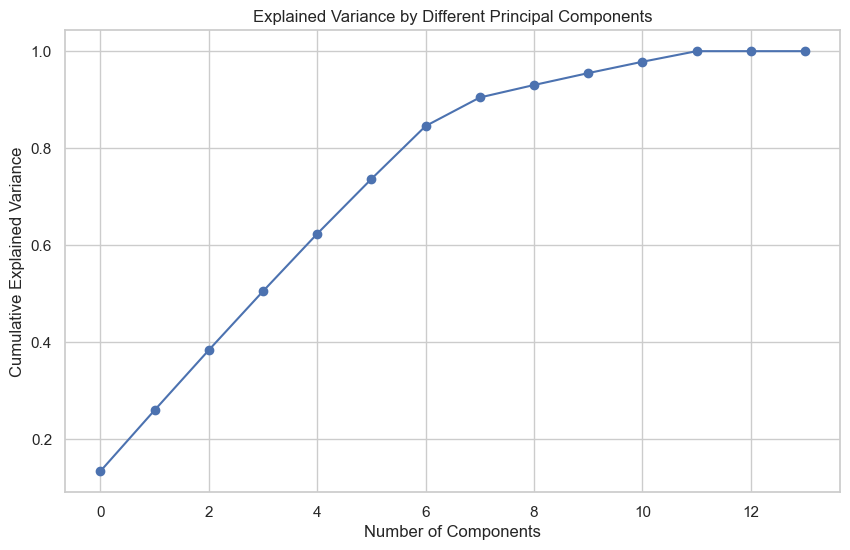

array([0.13365995, 0.25952861, 0.38347786, 0.50481674, 0.62330929,
       0.7364009 , 0.84556735, 0.90446574, 0.93018219, 0.95473783,
       0.97813984, 1.        , 1.        , 1.        ])

In [131]:
# Initialize PCA
pca = PCA()

# Fit PCA on the feature set (X)
pca.fit(X)

# Calculate the cumulative sum of explained variance ratio
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(explained_variance_ratio_cumsum, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

explained_variance_ratio_cumsum

- Insights from the Plot
  - Rapid Accumulation: The variance accumulates rapidly with the first few components, reaching about 73.6% by the 6th component.
  - Diminishing Returns: After the 8th component, the gain in explained variance significantly tapers off, reaching around 90.4%.
  - Near Completion: By the 12th component, the variance explained is 100%, but the additional gain after the 10th component is minimal.
- Based on the elbow-like bend around the 6th to 8th components and considering the diminishing returns beyond these points, a practical choice could be:
  - 6 components for a more compact model while retaining approximately 73.6% of the variance.
  - 8 components to capture over 90% of the variance for more detailed analysis, which might be more useful if slight nuances in the data are critical for the analysis or predictive modeling.

3. Interpret Principal Components:

To interpret the principal components, we will look at the loading scores (the coefficients of each original feature in each component). These scores will tell us how each original feature influences a principal component.

In [132]:
# Extracting the loading scores for the principal components
loadings = pca.components_

# Creating a DataFrame to view the loading scores of the first 8 components
loadings_df = pd.DataFrame(loadings[:8], columns=X.columns).transpose()

# Display the loading scores for easier interpretation
loadings_df


,0,1,2,3,4,5,6,7
Age,-0.201689,0.382449,0.419304,0.124943,0.771158,-0.095048,0.093643,-0.093012
Annual_Income,0.286248,-0.558823,0.362921,-0.120747,0.270024,0.596551,-0.171777,0.017354
Total_Purchases,0.543362,0.230120,-0.106401,0.512654,0.073039,-0.084194,-0.600776,0.063508
Average_Purchase_Value,0.138048,0.180178,-0.498746,-0.694789,0.374824,0.017947,-0.257354,0.093755
Website_Visits_Last_Month,-0.503243,0.293250,-0.273718,0.233960,-0.055724,0.698482,-0.199569,-0.002641
Marketing_Emails_Opened,0.032095,-0.409442,-0.593408,0.404782,0.413018,-0.034039,0.373051,-0.050846
Hours_Spent_on_Support_Calls,0.549633,0.449424,-0.011988,-0.022850,-0.092687,0.371382,0.589791,0.014010
Gender_Female,0.056059,0.008900,-0.037898,-0.048953,-0.034939,0.014384,-0.060647,-0.696548
Gender_Male,-0.056059,-0.008900,0.037898,0.048953,0.034939,-0.014384,0.060647,0.696548
Product_Category_Most_Purchased_Books,-0.005997,0.001645,0.042185,-0.006990,-0.006201,-0.000621,0.002704,0.051408


- Analysis of Principal Components Loadings:
  - Principal Component 1 (PC1):
    - Strong positive weights on Total_Purchases and Hours_Spent_on_Support_Calls suggest this component might represent customers who are both frequent shoppers and require more support.
    - Negative weight on Website_Visits_Last_Month indicates a contrast with the browsing behavior.
  - Principal Component 2 (PC2):
    - Strong negative weight on Annual_Income coupled with a positive weight on Age suggests this component contrasts younger, higher-income customers against others.
    - This could represent a distinction based on economic status and possibly life stage.
  - Principal Component 3 (PC3):
    - This component is heavily influenced by Age (positive) and Marketing_Emails_Opened (negative), suggesting it differentiates between older customers who open fewer emails and possibly younger, more digitally engaged customers.
  - Principal Component 4 (PC4):
    - Dominated by negative weights in Average_Purchase_Value with positive weights in Marketing_Emails_Opened, this might capture variance related to the value of purchases versus engagement with marketing.
  - Principal Components 5-8:
    - As we move to higher components, the interpretations become less intuitive and might capture more specific or less significant behaviors or characteristics.
- Visualizing High-Dimensional Data:
  - To visualize the results of PCA in a way that is interpretable, we can plot the scores of the first two or three principal components. This often reveals clustering of similar observations and can help identify distinct groups within the data based on their principal component scores.


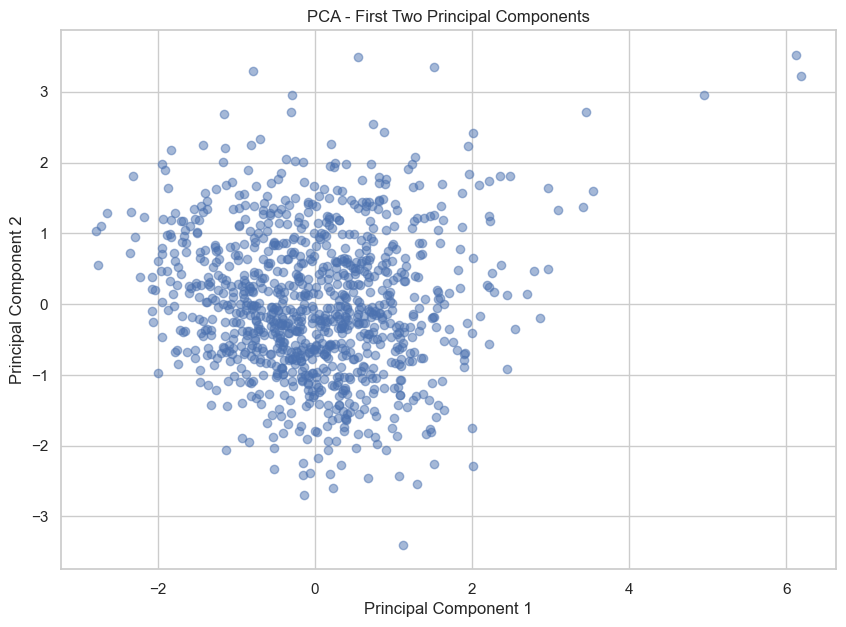

In [133]:
# Assuming PCA transformation has been applied and stored in `X_pca`
X_pca = pca.transform(X)

# Scatter plot of the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - First Two Principal Components')
plt.grid(True)
plt.show()


- Observations from the Scatter Plot:
  - Density and Spread:
    - The plot shows a dense cluster around the center, suggesting that most data points (customers) share similar characteristics to a certain extent when viewed in the context of these two principal components.
    - There are several outliers or points spread further away from the center, especially along the Principal Component 1 axis. These could represent customers with more distinct or less common behaviors.
  - Principal Component Axes:
    - Principal Component 1 (Horizontal Axis): Given the loading analysis, this component is influenced heavily by Total Purchases and Hours Spent on Support Calls, positively, and Website Visits Last Month, negatively. The spread along this axis might distinguish between customers who make many purchases and need more support versus those who are frequent website visitors but may not purchase as much.
    - Principal Component 2 (Vertical Axis): This component is primarily influenced by Age, positively, and Annual Income, negatively. The vertical spread suggests variability in customer demographics, particularly age and income levels.
- Interpretation:
  - Clusters and Potential Segments:
    - The central clustering indicates a large group of customers with average behaviors according to the captured principal components.
    - Customers towards the right may be your more engaged or high-maintenance customers, potentially requiring targeted marketing strategies or specific customer service approaches.
    - Those further up or down might represent different age groups or economic segments, which could be targeted with age-appropriate or income-sensitive products and services.

Now do a cluster analysis with the PCA-Reduced data:

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/var/folders/5v/l60713ps6gz1y72cj6ls8g_w0000gn/T/ipykernel_52596/1162726261.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='Cluster Label')


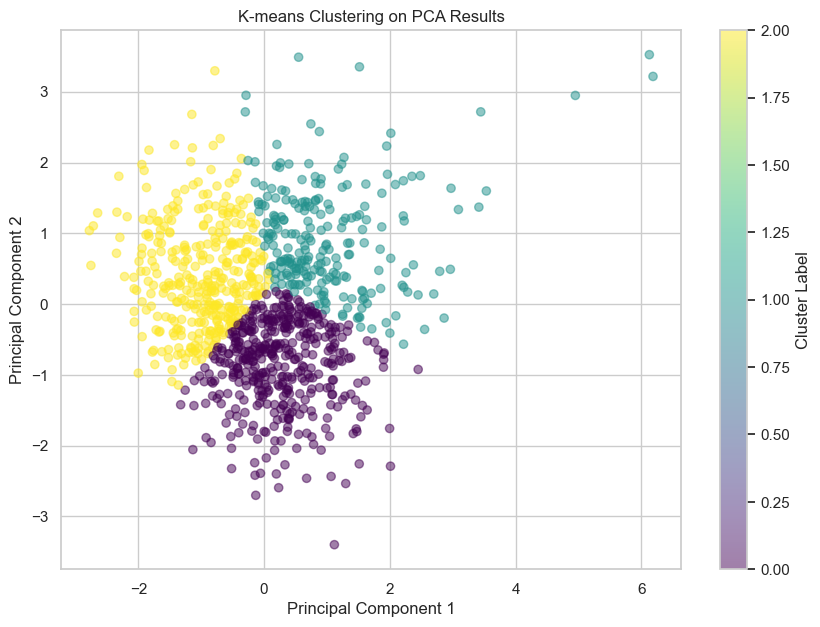

In [134]:
# Assuming PCA transformation has been applied and stored in X_pca
# We'll cluster based on the first two principal components
kmeans = KMeans(n_clusters=3, random_state=0)  # Let's try with 3 clusters initially
labels = kmeans.fit_predict(X_pca[:, :2])

# Plotting the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering on PCA Results')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


- The clustering has divided the dataset into three distinct groups, each marked by different colors in the plot:
  - Purple Cluster: Primarily concentrated around the center, suggesting these customers might have average values on the underlying variables represented by the first two principal components.
  - Yellow Cluster: Positioned further along the positive direction of Principal Component 1, indicating these customers could have higher scores on features contributing positively to this component, such as more frequent purchases or higher support needs.
  - Cyan Cluster: More spread out, particularly along both principal components, indicating variability in their scores and possibly representing a more diverse group in terms of the underlying behaviors.

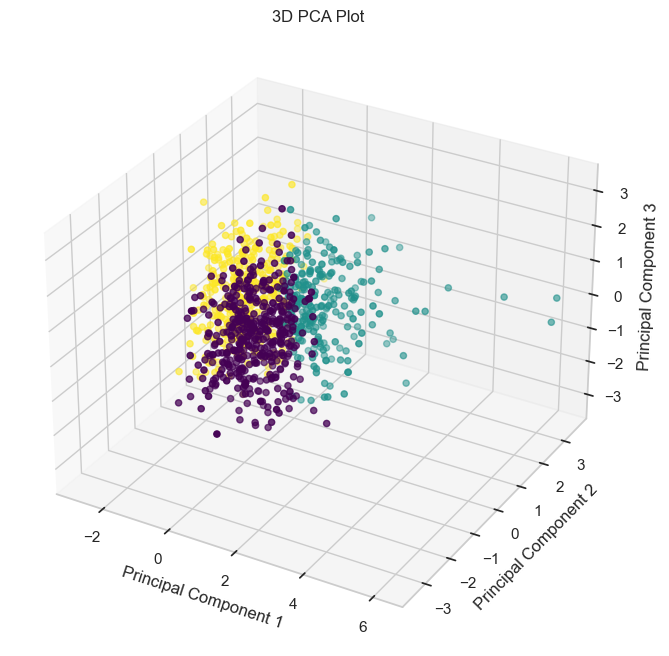

In [135]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Plot')
plt.show()

- The 3D plot provides an additional dimension of analysis, allowing us to see the spread along the third principal component. This view helps identify deeper structures within the data:
  - The additional component adds depth to our understanding of the clusters, showing how they might differ not just along two dimensions but three, providing a more nuanced view of customer behaviors.

Overlay Categorical Data:

In [136]:
customer_data['PCA1'] = X_pca[:, 0]
customer_data['PCA2'] = X_pca[:, 1]
if X_pca.shape[1] > 2:
    customer_data['PCA3'] = X_pca[:, 2]  # If you've calculated a third component


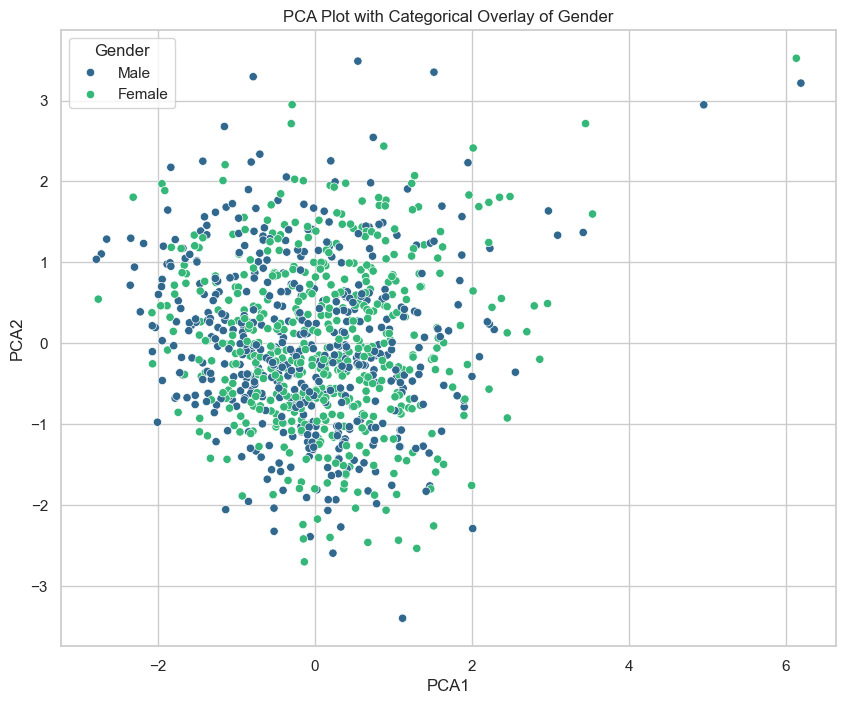

In [137]:
# 2D Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Gender', data=customer_data, palette='viridis')
plt.title('PCA Plot with Categorical Overlay of Gender')
plt.show()


There doesn't appear to be any pattern for the clustering of Gender. So, I will now analyze how it looks for the products that are purchased.

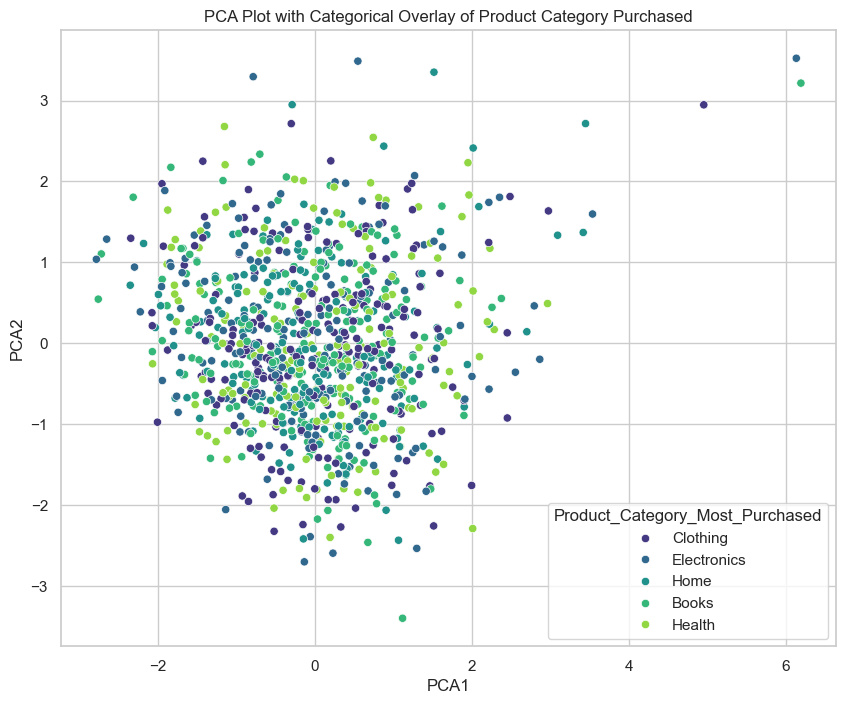

In [138]:
# 2D Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Product_Category_Most_Purchased', data=customer_data, palette='viridis')
plt.title('PCA Plot with Categorical Overlay of Product Category Purchased')
plt.show()

- Observations:
  - Overlap: All categories appear to have a substantial overlap in the central cluster, indicating that customers purchasing different types of products share similar traits or behaviors in terms of the components analyzed.
  - Sparse Separation: There are some sparse separations where certain categories like Health and Electronics show slightly more distinct distributions, possibly indicating some unique characteristics of these customer groups, but these are not strongly pronounced.
- Insights and Strategic Implications:
  - Homogeneous Customer Behaviors: The overlap suggests that across different product categories, customer behaviors (as captured by PCA) are fairly homogeneous. This could imply that marketing strategies focusing purely on behavioral segmentation may not need to differentiate strongly between product categories.
  - Subtle Differences: The subtle differences that do exist could be explored further, perhaps by analyzing more components or using a different analysis approach that could tease out nuances, such as factor analysis or a finer-grained clustering algorithm.
  - Targeted Marketing Trials: Run small-scale targeted marketing trials for each product category to see if subtle differences can be amplified in terms of customer response, which might not be evident from the PCA alone.
  - Cross-Sell Strategies: Since there is significant overlap among the customers buying different categories, strateg

# Image Analysis: 

In [154]:
# Importing necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [155]:
# Step 2: Load and preprocess the data
def load_data(base_dir, img_size=(64, 64), batch_size=32):
    train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='training')
    
    validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')

    return train_generator, validation_generator

In [156]:
# Step 3: Build the model
def build_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [157]:

# Step 4: Train the model
def train_model(model, train_gen, val_gen, epochs=10):
    history = model.fit(train_gen, epochs=epochs, validation_data=val_gen, verbose=2)
    return history

In [158]:
# Step 5: Evaluate the model
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(acc))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    
    plt.show()


Found 452 images belonging to 2 classes.
Found 112 images belonging to 2 classes.


Epoch 1/10
15/15 - 3s - loss: 0.7094 - accuracy: 0.5465 - val_loss: 0.6798 - val_accuracy: 0.5804 - 3s/epoch - 223ms/step
Epoch 2/10
15/15 - 3s - loss: 0.6868 - accuracy: 0.5841 - val_loss: 0.6785 - val_accuracy: 0.5804 - 3s/epoch - 177ms/step
Epoch 3/10
15/15 - 3s - loss: 0.6865 - accuracy: 0.5819 - val_loss: 0.6822 - val_accuracy: 0.5804 - 3s/epoch - 178ms/step
Epoch 4/10
15/15 - 3s - loss: 0.6878 - accuracy: 0.5841 - val_loss: 0.6761 - val_accuracy: 0.5804 - 3s/epoch - 190ms/step
Epoch 5/10
15/15 - 3s - loss: 0.6804 - accuracy: 0.5841 - val_loss: 0.6747 - val_accuracy: 0.5804 - 3s/epoch - 179ms/step
Epoch 6/10
15/15 - 3s - loss: 0.6736 - accuracy: 0.5841 - val_loss: 0.6797 - val_accuracy: 0.5804 - 3s/epoch - 181ms/step
Epoch 7/10
15/15 - 3s - loss: 0.6677 - accuracy: 0.5863 - val_loss: 0.6890 - val_accuracy: 0.5625 - 3s/epoch - 177ms/step
Epoch 8/10
15/15 - 3s - loss: 0.6689 - accuracy: 0.5752 - val_loss: 0.7001 - val_accuracy: 0.5804 - 3s/epoch - 174ms/step
Epoch 9/10
15/15 - 3s - 

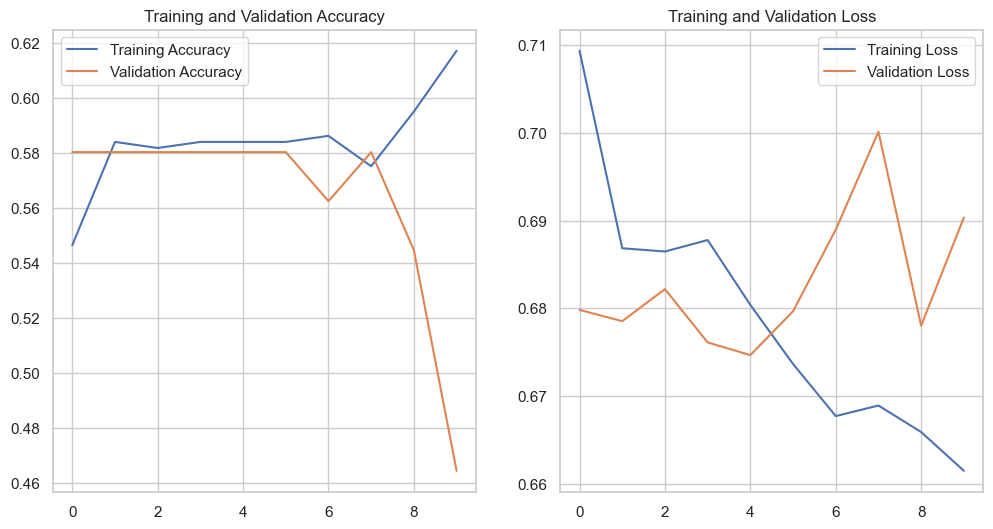

In [159]:
# Loading the data
# Main execution: Set your directory path
base_dir = '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Advanced Data Science/Projects/Final Project/Training Pictures'

# Prepare data
train_gen, val_gen = load_data(base_dir)

# Build and train model
model = build_model(input_shape=(64, 64, 3))
history = train_model(model, train_gen, val_gen)

# Visualize results
plot_results(history)

- Training and Validation Accuracy
  - Training Accuracy:
    - The training accuracy begins at approximately 0.54 and shows a significant upward trend, reaching above 0.62 by the end of the training process.
    - This suggests that the model is learning from the training data and improving its ability to correctly classify the training images over epochs.
  - Validation Accuracy:
    - The validation accuracy starts near the training accuracy but displays more variability across epochs. It peaks around the midpoint of training close to 0.58 and then fluctuates before slightly increasing again near the end.
    - The fluctuations in validation accuracy and its general underperformance compared to training accuracy suggest that the model may be overfitting the training data or that the validation data might be somewhat different in character or more challenging than the training data.
- Training and Validation Loss
  - Training Loss:
    - The training loss starts at around 0.71 and steadily decreases to approximately 0.66, with minor fluctuations. This decline in loss is consistent with the increase in training accuracy, indicating that the model is effectively learning and optimizing its parameters.
  - Validation Loss:
    - The validation loss also decreases initially but then shows significant variability, including a sharp spike before the end. Such variability often points to issues like model overfitting, where the model learns the training data's noise and details at the expense of its ability to generalize to new data.
    - The spike and subsequent drop suggest that some epochs may be reacting too specifically to certain features of the training set that do not generalize well to the validation set.
- Overall Interpretation
  - Learning and Generalization: The model is learning as indicated by the training accuracy and loss improvements. However, the high variability in validation accuracy and loss suggests that the model's ability to generalize to unseen data could be improved. The model may be capturing noise and specific patterns in the training data that do not apply to the validation data.
  - Overfitting: The signs of possible overfitting are present, as the model performs better on training data compared to validation data. This can be mitigated by techniques such as increasing data augmentation, adding dropout layers (or increasing dropout rate if already present), implementing early stopping, or using regularization methods.
  - Model Evaluation and Adjustment: I might want to consider using a learning rate scheduler to adjust the learning rate dynamically during training or experimenting with different architectures or hyperparameters to find a better balance between learning from the training data and generalizing to new data.

These steps outline the way to train a neural network on images that are positive or negative. Now, I will develop the test set. 

In [164]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/Users/jonahzembower/Library/CloudStorage/OneDrive-SetonHillUniversity/Semester Classwork/Spring 2024 Semester SHU/Advanced Data Science/Projects/Final Project/Test Pictures',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',  # Use 'binary' for binary classification
    shuffle=False  # Do not shuffle to keep labels and predictions in order
)


Found 22 images belonging to 2 classes.


In [165]:
eval_result = model.evaluate(test_generator)
print(f"Test Loss: {eval_result[0]}, Test Accuracy: {eval_result[1]}")


1/1 [==============================] - 0s 130ms/step - loss: 0.6665 - accuracy: 0.7273
Test Loss: 0.66653972864151, Test Accuracy: 0.7272727489471436


In [166]:
predictions = model.predict(test_generator)
labels = (predictions > 0.5).astype(int)

# Function to map predictions to labels
def label_images(predictions):
    return ['Positive' if pred > 0.5 else 'Negative' for pred in predictions]

labeled_images = label_images(predictions)


1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 50ms/step


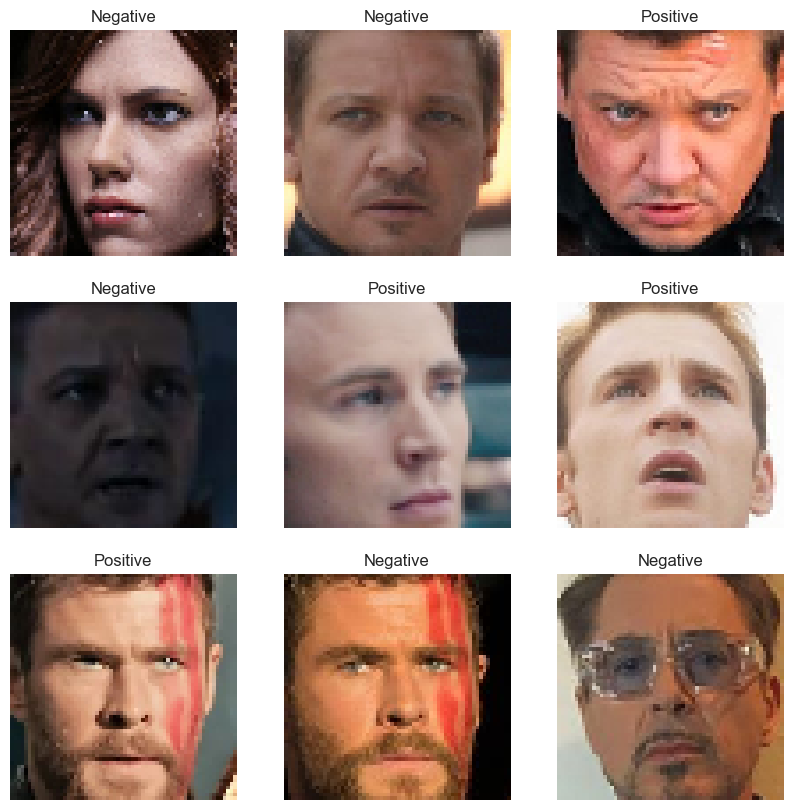

In [167]:
def plot_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Fetch a batch of test images and their true labels
test_imgs, test_labels = next(iter(test_generator))

# Plot images with predicted labels
plot_images(test_imgs, label_images((model.predict(test_imgs) > 0.5).astype(int)))


These images were relatively correct from what they were supposed to be as positive referring to smiling and happy and negative as not happy. The top right and bottom left seemed to be incorrect, but the other images were correct out of 9. This is accurate about 70% here and follows with the general accuracy rate seen from the evaluation of the model. Therefore, further feature analysis could be used in the future to develop a more accurate model. 